<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/7_olivar_montes_edwin/especies_en_riesgo_edwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Especies en peligro

## [Video de apoyo](https://www.youtube.com/watch?v=_HDSPy3FI04&t=508s)

Una organización de conservación libera 25 iguanas de Caucasia en el campus de la Seccional Bajo Cauca de la Universidad de Antioquia.   

Después de 1 años, hay 39 iguanas en la zona.   

La seccional tiene una capacidad límite o de soporte de 350 iguanas.  

a) Escribir una ecuación logística que modele la población de las iguanas en la Seccional. 

Recuerde que en general la ecuación diferencial logística tiene la forma:

$$ \frac{dy}{dt} = ky\left(1 - \frac{y}{L} \right) $$

### Interpretación de la ED logística
La velocidad de variación de $y$ es proporcional el tamaño de la población en el instante $t$ y al porcentaje de individuos que faltan para alcanzar la población límite. 

$$ \frac{dp}{dt}(t) = kp(t)\left( 1 - \frac{p(t)}{L} \right) $$

donde $k$ es la constante de proporcionalidad. 

b) Encontrar la población después de 5 años.  

c) ¿Cuándo la población será de 100 iguanas?  

d) Escribir una ecuación diferencial logística que modele la tasa de crecimiento de la población de las iguanas. 

Entonces repetir el apartado b) mediante el método de Euler con un tamaño de paso de $h = 1$. 

Comparar la aproximación con las respuestas exactas.  

e) ¿En qué tiempo la población de iguanas crecerá más rápidamente? Explicar.

## Solución

## Escribe el modelo o PVI que representa el problema y cuya solución permite realizar predicciones sobre el comportamiento de la especie en riesgo

$$ \frac{dp}{dt} = kp\left(1 - \frac{p}{350} \right), \ \ \ \ \ \ p(0) = 25,\ \ \ \ \  p(1) = 39 $$

donde $k$ es la constante de proporcionalidad y $t$ es medido en años.

In [16]:
# definición de los tres parámetros del problema
L = 350
p0 = 25
p1 = 39

## Redacta una interpretación de la ED y de la condición inicial 

La velocidad de crecimiento de la población de iguanas en un tiempo $t$, $\frac{dp}{dt}(t)$,  es proporcional al número de iguanas en el mismo año $t$, $p(t)$ y al porcentaje de iguanas faltantes para llegar a la población límite en el refugio, $\left(1-\frac{p(t)}{500}\right)$. 

## Clasifica la ED que hace parte del PVI para poder establecer el método de solución del problema 

La ED dada es una Ecuación de primer orden pues la única derivada de presente en la ED es de orden 1.  

La ED es separable pues es de la forma:

$$p' = F(p)G(t)$$
 

## Soluciona analíticamente el PVI, es decir, redacta en lenguaje latex la solución describiendo o justificando, según el caso, cada paso del proceso de solución

$$ \frac{dp}{dt} = kp\left( 1 - \frac{p}{350}\right), \ \ \ p(0) = 25, \ \ p(2) = 39 $$

Empecemos sepando las variables transponiendo factores: 

$$\frac{1}{p\left( 1 - \frac{p}{350} \right)} dp = kdt $$


Restas fracciones y divides para obtener la expreseión simplificada: 

$$ \frac{350}{p(350 - p)}dp = kdt $$

Descompongamos en fracciones parciales a la fracción propia:

$$ \frac{350}{p(350 - p)} $$


Cómo los factores del denominador son lineales no repetidos, entonces esta fracción descompone como:

$$ \frac{350}{p(350 - p)} = \frac{A}{p} + \frac{B}{350 - p} $$


$$ \frac{350}{p(350 - p)} = \frac{A(350 - p) + Bp}{p(350 - p)} $$

de donde $A = B = 1$ y por tanto la descomposición en fracciones parciales nos queda:

$$ \frac{350}{p(350 - p)} = \frac{1}{p} + \frac{1}{350 - p} $$


$$ \int \left( \frac{1}{p} + \frac{1}{350 - p} \right)dp = \int kdt $$

## Verificación analítica de la solución encontrada

Recuerde que esto implica verificar que la solución satisface la ED y luego verificar que también satisface la condición inicial y la condición de frontera. 

## Determinación del orden de la ED

In [17]:
from sympy import var, Function, diff, Eq, ode_order

In [18]:
p,t,k = var('p,t,k') 

In [19]:
p = Function('p')

In [21]:
eq = Eq(diff(p(t), t), k*p(t)*(1-p(t)/L))

In [22]:
ode_order(eq, p(t))

1

Así, hemos verificado que la ecuación diferencial es de orden 1

## Clasifica la ED utilizando la función `classify_ode()` de sympy

In [24]:
from sympy import classify_ode

In [25]:

classify_ode(eq, p(t))

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

## Soluciona con sympy el PVI

In [26]:
from sympy import dsolve, checkodesol, solve

In [27]:
sol_gen = dsolve(eq, p(t), hint = 'separable') 
sol_gen 

Eq(p(t), 350/(C1*exp(-k*t) + 1))

La anterior es la solución general explícita de la ED que hace parte del PVI

In [37]:
sol_pvi = dsolve(eq, p(t), hint = 'separable', ics = {sol_gen.lhs.subs(t, 0):p0})
sol_pvi 

Eq(p(t), 350/(1 + 13*exp(-k*t)))

Pero todavía no conocemos la constante de proporcionalidad $k$. 

## Determine el valor de la constante de proporcionalidad $k$

In [29]:
eq_k = Eq(solucion_pvi.lhs.subs(t,1).subs(p(1), 39), solucion_pvi.rhs.subs(t,1))
eq_k

Eq(39, 350/(1 + 13*exp(-k)))

In [33]:
from sympy import exp, log
solve(39-350/(1+13*exp(-k)), k)[0] # ojo, solve es una función que pide la ecuación igualada a cero

log(507/311)

In [34]:
round(log(507/311),2)

0.49

Entonces la solución del PVI con la constante de proporcionalidad $k$ es 


$$ p(t) = \frac{350}{13e^{-0.49t} + 1} $$


In [40]:
sol_completa = solucion_pvi.subs(k, log(507/311))
sol_completa 

Eq(p(t), 350/(1 + 13*exp(-0.488718091411949*t)))

## Verifica que la solución encontrada es correcta utilizando sympy

In [31]:
from sympy import checkodesol

In [35]:
checkodesol(eq,sol_gen)

(True, 0)

In [38]:
checkodesol(eq,sol_pvi)

(True, 0)

In [37]:
sol_completa.subs(t,3.3)

Eq(p(3.3), 97.4563404229809)

Veamos que la condición inicial también se verifica

In [41]:
sol_completa.subs(t, 0)

Eq(p(0), 25)

In [42]:
sol_completa.subs(t,1)

Eq(p(1), 39.0)

#### Conclusion: La solución encontrada satisface la ED y las condiciones iniciales y de frontera

## Gráfica animada de la solución general

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

from ipywidgets import interact 

def sol_Gen(t, C1):
    return 350/(C1*np.exp(-0.49*t)+1)


def grafica_de_algunas_soluciones(C1 = 1):
    dominio = np.arange(0, 15, 0.25)
    rango = [sol_Gen(t, C1 = C1) for t in dominio]
    plt.plot(dominio, rango)
    plt.grid(alpha = 0.4)
    plt.plot([np.min(dominio), np.max(dominio)],[350, 350], 'r-.', label = 'Población límite')
    plt.legend()
    
interact(grafica_de_algunas_soluciones, C1 = (1,13))  

plt.show()

interactive(children=(IntSlider(value=1, description='C1', max=13, min=1), Output()), _dom_classes=('widget-in…

## Cinco observaciones o inferencias del gráfico animado de la solución general

1. Las soluciones graficadas son todas funciones estrictamente crecientes 
2. Las soluciones todas tienen asíntota horizontal $y = 350$. 
3.  
4.  
5.  

## Gráfica con Matplotlib la solución del PVI

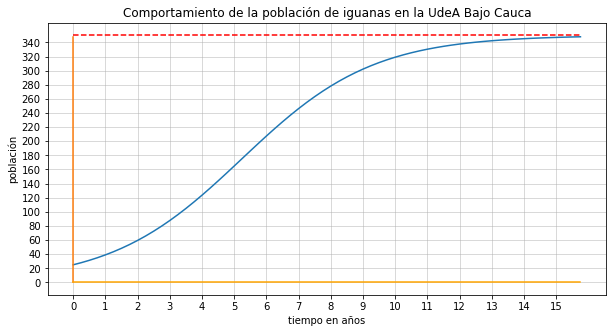

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize = (10,5)) 

ax.set(title = 'Comportamiento de la población de iguanas en la UdeA Bajo Cauca',\
      xlabel = 'tiempo en años', ylabel = 'población')

dominio = np.arange(0,16,0.25)
l = 350
rango = 350/(13*np.exp(-0.49*dominio) + 1)

ax.plot(dominio, rango) # grafica de la curva de población 
ax.plot([0, 0], [0, np.max(rango)]) # grafico del eje vertical
ax.plot([np.min(dominio), np.max(dominio)], [0,0], 'orange')   # gráfico del eje horizontal
ax.plot([0, np.max(dominio)], [l, l], 'r--')  # grafico de la asíntota horizontal
plt.yticks(np.arange(0, 350, step=20)) 
plt.xticks(np.arange(0, 16, step=1)) 
ax.grid(alpha = 0.6)

plt.savefig('solucion_del_PVI.jpg')

plt.show()


In [57]:
def sol_Pvi_completa(t):
    return int(350/(13*np.exp(-0.49*t)+1))

In [58]:
sol_Pvi_completa(5)

164

## Cinco observaciones o inferencias del gráfico de la solución del PVI

1.  La población $p(t)$ es una función estrictamente creciente con población inicial igual a 25. 
2.  La población al cabo de un año es de aproximadamente 40 iguanas
3.  
4.  
5.  


## Gráfica con Matplotlib la solución del PVI con la grafica de la pendiente de la curva en cada punto de la misma utilizando la animación dada por la función interact

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

def sol_Pvi_completa(t):
    return int(350/(13*np.exp(-0.49*t)+1))

def derivada_p(t):
    return 0.49*sol_Pvi_completa(t)*(1 - sol_Pvi_completa(t)/L )


def pendiente_curva(t0 = 0):
    fig, ax = plt.subplots(figsize = (14,7)) 
    ax.scatter([t0],[sol_Pvi_completa(t0)], color = 'red')
    dominio_recta_tangente = np.arange(t0-1, t0+1, 0.25)
    # 
    rango_recta_tangente = []
    ax.set(title = 'Comportamiento de la población de iguanas en la UdeA Bajo Cauca',\
      xlabel = 'tiempo en años', ylabel = 'población de iguanas')

    dominio = np.linspace(0,16,200, endpoint = True)
    rango = 350/(13*np.exp(-0.49*dominio) + 1)

    ax.plot(dominio, rango) # grafica de la curva de población 
    ax.plot([0, 0], [0, np.max(rango)]) # grafico del eje vertical
    ax.plot([np.min(dominio), np.max(dominio)], [0,0], 'orange')   # gráfico del eje horizontal
    ax.plot([0, np.max(dominio)], [l, l], 'r--')  # grafico de la asíntota horizontal
    plt.yticks(np.arange(0, 350, step=25)) 
    ax.grid(alpha = 0.6)


interact(pendiente_curva, t0 = (0,16, 0.5))

plt.show()

interactive(children=(FloatSlider(value=0.0, description='t0', max=16.0, step=0.5), Output()), _dom_classes=('…

## Gráfico de la función derivada $\frac{dp}{dt}(t)$

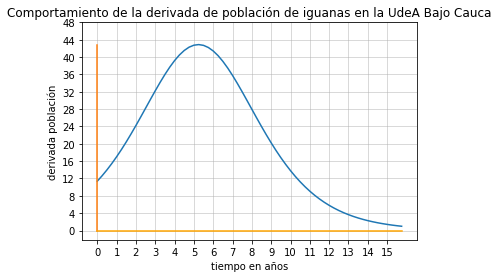

In [13]:
def p(t):
    return 350/(13*np.exp(-0.49*t) + 1)

def derivada_de_p(t):
    return 0.49*p(t)*(1-p(t)/350)


import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

ax.set(title = 'Comportamiento de la derivada de población de iguanas en la UdeA Bajo Cauca',\
      xlabel = 'tiempo en años', ylabel = 'derivada población')

dominio = np.arange(0,16, 0.25)
l = 350
rango = [derivada_de_p(t) for t in dominio]

ax.plot(dominio, rango) # grafica de la curva derivada de población 
ax.plot([0, 0], [0, np.max(rango)]) # grafico del eje vertical
ax.plot([np.min(dominio), np.max(dominio)], [0,0], 'orange')   # gráfico del eje horizontal

ax.grid(alpha = 0.6)
plt.yticks(np.arange(0,50,4))
plt.xticks(np.arange(0,16))
plt.show() 

## Cinco observaciones o inferencias del gráfico de la función velocidad de crecimiento de la población de iguanas

1.  La velocidad máxima es de 43 y se da a los cinco años. 
2.  
3.  
4.  
5.  

# El método de Euler  

Página 429 de larson, sección 6.1: Campo de pendientes y método de Euler

El método de Euler es un método numérico para aproximar la solución particular de la ecuación diferencial

$$ y' = F(x, y)$$


que pasa a través del punto $(x_{0}, y_{0})$.

Con esta información se sabe que la gráfica de esa solución pasa a través del punto $(x_{0}, y_{0})$ y tiene una pendiente de $F(x_{0}, y_{0})$ en ese punto. 

Esto da un “punto inicial” para aproximar la solución.

A partir del punto inicial, se sigue en la dirección indicada por la pendiente. 

Mediante un pequeño paso $h$, se mueve a lo largo de la recta tangente hasta llegar al punto $(x_{1}, y_{1})$, donde

$$ x_{1} = x_{0} + h, \ \ \ \ \ \text{y} \ \ \ \ \ y_{1} = y_{0} + hF(x_{0}, y_{0}) $$

In [62]:
def euler(F,x0, y0, h, x_stop): # de a F como una función lambda de Python
    x = x0
    while x<=x_stop:
        x = x+h
    return y

## Referencias

* Página 452 de Zill. 

In [9]:
from sympy import * 
x = Symbol('x')

In [11]:
solve((x+1,0),x)

{x: -1}